# Selection of Stocks into a Portfilio #

In the current document we show how you can pick the best stock and strategy combinations out of a big collecion from a universe.

## Setup ##
### Import Libraries ###

In [161]:
%classpath config resolver maven-public http://software.pschatzmann.ch/repository/maven-public/
%classpath add mvn ch.pschatzmann:investor:0.9-SNAPSHOT
%classpath add mvn ch.pschatzmann:jupyter-jdk-extensions:0.0.1-SNAPSHOT


### Imports ###

In [162]:
// our stock evaluation framwork
import ch.pschatzmann.dates._;
import ch.pschatzmann.stocks._;
import ch.pschatzmann.stocks.data.universe._;
import ch.pschatzmann.stocks.input._;
import ch.pschatzmann.stocks.accounting._;
import ch.pschatzmann.stocks.accounting.kpi._;
import ch.pschatzmann.stocks.execution._;
import ch.pschatzmann.stocks.execution.fees._;
import ch.pschatzmann.stocks.execution.price._;
import ch.pschatzmann.stocks.parameters._;
import ch.pschatzmann.stocks.strategy._;
import ch.pschatzmann.stocks.strategy.optimization._;
import ch.pschatzmann.stocks.strategy.allocation._;
import ch.pschatzmann.stocks.strategy.selection._;
import ch.pschatzmann.stocks.integration._;
import ch.pschatzmann.stocks.integration.ChartData.FieldName._;
import ch.pschatzmann.stocks.strategy.OptimizedStrategy.Schedule._;

// java
import java.util.stream.Collectors;
import java.util._;
//import java.util.function.Consumer;

// log4j
import org.apache.log4j._;

/// jupyter custom displayer
import ch.pschatzmann.display.Displayers


import ch.pschatzmann.dates._
import ch.pschatzmann.stocks._
import ch.pschatzmann.stocks.data.universe._
import ch.pschatzmann.stocks.input._
import ch.pschatzmann.stocks.accounting._
import ch.pschatzmann.stocks.accounting.kpi._
import ch.pschatzmann.stocks.execution._
import ch.pschatzmann.stocks.execution.fees._
import ch.pschatzmann.stocks.execution.price._
import ch.pschatzmann.stocks.parameters._
import ch.pschatzmann.stocks.strategy._
import ch.pschatzmann.stocks.strategy.optimization._
import ch.pschatzmann.stocks.strategy.allocation._
import ch.pschatzmann.stocks.strategy.selection._
import ch.pschatzmann.stocks.integration._
import ch.pschatzmann.stocks.integration.ChartData.FieldName._
import ch.pschatzmann.stocks.strategy.OptimizedStrategy.Schedule._
import java.util.stream...

### Deactivate Logging and Caching ###

In [163]:
var root = Logger.getRootLogger();
root.setLevel(Level.ERROR);
Context.setCachingActive(false);
Context.isCachingActive();

false

## Selection of all Stocks and Strategies ##


First we need to specify the strategies that we want to use for the evaluation. We just use all:

In [164]:
TradingStrategyFactory.list()

[CCICorrectionStrategy, GlobalExtremaStrategy, MovingMomentumStrategy, RSI2Strategy, BuyAndHoldStrategy]

For defining the selection of stocks we use a universe 


In [165]:
new MarketUniverse("NASDAQ")


MarketUniverese: exchange=NASDAQ ticker=.*

and we define the optimization period as 2016-01-01-2016-21-31 and the trading period as
2017-01-01 to today:


In [166]:
Context.getDateRanges("2016-01-01","2017-01-01");


[20160101-20161231, 20170101-20180527]

### Run the Selection  - 1st Attempt ###

We define a StrategySelector and feed it to the StockSelector.
The optional Restartable parameter is making sure that we save the temporary result every 50 records so that we do not need to reprocess them when we need to restart the functionality.

We store the result in a file and make sure that we do not run the selection again if the file already exists.


In [167]:
// setup of the model
var periods = Context.getDateRanges("2016-01-01","2017-01-01");
var account = new Account("Simulation", "USD", 100000.00, periods.get(0).getStart(), new PerTradeFees(100.00))
var file = new java.io.File("NASDAQ-2017-01-01.json")
if (!file.exists()) {
    var universe = new MarketUniverse("NASDAQ")
    var strategies = TradingStrategyFactory.list()
    var strategySelector = new StrategySelector(account, strategies, periods.get(0), KPI.AbsoluteReturn)
    var stockSelector = new StockSelector(strategySelector, new Restartable("restart-v1.ser",50))
    // calculate the result
    var result = stockSelector.getSelection(200, universe, new MarketArchiveHttpReader())
    // save the result to a file
    result.save(file) 
} 
// provide result even if we did not run the selection above
var result = new SelectionResult()
result.load(file)

"**END**"

**END**

### Evaluate the Selection ###

Here is the result of the selection:

In [168]:
Displayers.display(Context.tail(result.getResult(),10));


input result stockID strategyName optimized Key Value parameters {NumberOfTicks={value=7.0, range={min=1, max=500}}, BuyFactor={value=1.0, range={min=1.001, max=5.0}}, SellFactor={value=1.0, range={min=0.005, max=0.999}}} Key Value parameters {RealizedGains={value=28314.0, range=null}, Cash={value=10.0, range=null}, ReturnPercent={value=20.0, range=null}, NumberOfBuys={value=7.0, range=null}, ReturnPercentAnualized={value=10.0, range=null}, MaxDrawDownHighValue={value=148193.0, range=null}, NumberOfCashTransfers={value=1.0, range=null}, AbsoluteReturnStdDev={value=2483.0, range=null}, MaxDrawDownNumberOfDays={value=185.0, range=null}, AbsoluteReturnAvaragePerDay={value=39.0, range=null}, NumberOfSells={value=6.0, range=null}, ActualValue={value=120332.0, range=null}, UnrealizedGains={value=-6683.0, range=null}, PurchasedValue={value=127014.0, range=null}, MaxDrawDownPercent={value=68951.0, range=null}, NumberOfTradedStocks={value=1.0, range=null}, MaxDrawDownLowValue={value=79242.0, range=null}, AbsoluteReturn={value=20332.0, range=null}, ReturnPurcentStdDev={value=0.0, range=null}, SharpeRatio={value=0.0, range=null}, NumberOfTrades={value=13.0, range=null}, TotalFees={value=1300.0, range=null}} Key Value ticker MYRG exchange NASDAQ GlobalExtremaStrategy false Key Value parameters {SignalEMA={value=18.0, range={min=16, max=20}}, EntrySignal={value=20.0, range={min=10, max=30}}, ExitSignal={value=80.0, range={min=70, max=90}}, ShortEMAPeriod={value=9.0, range={min=1, max=20}}, StochasticOscillatorKIndicator={value=14.0, range={min=7, max=21}}, LongEMAPeriod={value=26.0, range={min=20, max=40}}} Key Value parameters {RealizedGains={value=20387.0, range=null}, Cash={value=120187.0, range=null}, ReturnPercent={value=20.0, range=null}, NumberOfBuys={value=1.0, range=null}, ReturnPercentAnualized={value=10.0, range=null}, MaxDrawDownHighValue={value=103986.0, range=null}, NumberOfCashTransfers={value=1.0, range=null}, AbsoluteReturnStdDev={value=1070.0, range=null}, MaxDrawDownNumberOfDays={value=56.0, range=null}, AbsoluteReturnAvaragePerDay={value=41.0, range=null}, NumberOfSells={value=1.0, range=null}, ActualValue={value=120187.0, range=null}, UnrealizedGains={value=0.0, range=null}, PurchasedValue={value=120187.0, range=null}, MaxDrawDownPercent={value=14888.0, range=null}, NumberOfTradedStocks={value=1.0, range=null}, MaxDrawDownLowValue={value=89098.0, range=null}, AbsoluteReturn={value=20187.0, range=null}, ReturnPurcentStdDev={value=0.0, range=null}, SharpeRatio={value=1.0, range=null}, NumberOfTrades={value=2.0, range=null}, TotalFees={value=200.0, range=null}} Key Value ticker TMUSP exchange NASDAQ MovingMomentumStrategy false Key Value parameters {SignalEMA={value=18.0, range={min=16, max=20}}, EntrySignal={value=20.0, range={min=10, max=30}}, ExitSignal={value=80.0, range={min=70, max=90}}, ShortEMAPeriod={value=9.0, range={min=1, max=20}}, StochasticOscillatorKIndicator={value=14.0, range={min=7, max=21}}, LongEMAPeriod={value=26.0, range={min=20, max=40}}} Key Value parameters {RealizedGains={value=20333.0, range=null}, Cash={value=120133.0, range=null}, ReturnPercent={value=20.0, range=null}, NumberOfBuys={value=1.0, range=null}, ReturnPercentAnualized={value=10.0, range=null}, MaxDrawDownHighValue={value=118822.0, range=null}, NumberOfCashTransfers={value=1.0, range=null}, AbsoluteReturnStdDev={value=947.0, range=null}, MaxDrawDownNumberOfDays={value=48.0, range=null}, AbsoluteReturnAvaragePerDay={value=39.0, range=null}, NumberOfSells={value=1.0, range=null}, ActualValue={value=120133.0, range=null}, UnrealizedGains={value=0.0, range=null}, PurchasedValue={value=120133.0, range=null}, MaxDrawDownPercent={value=11666.0, range=null}, NumberOfTradedStocks={value=1.0, range=null}, MaxDrawDownLowValue={value=107156.0, range=null}, AbsoluteReturn={value=20133.0, range=null}, ReturnPurcentStdDev={value=0.0, range=null}, SharpeRatio={value=1.0, range=null}, NumberOfTrades={value=2.0, range=null}, TotalFees={value=200.0, r

Finally we use the selected result as our portfolio and we can run a simulation on it for the
last year:

In [169]:
var account = new Account("Simulation","USD", 100000.00, periods.get(0).getStart(), new PerTradeFees(10.0));
var trader = new PaperTrader(account);
var allocationStrategy = new DistributedAllocationStrategy(trader);
var executor = new StrategyExecutor(trader, allocationStrategy);
executor.addStrategy(result.getStrategies(new MarketArchiveHttpReader()));
executor.run(periods.get(1));

println(account.getKPIValues())


[Absolute Return 25033.923488616943, Absolute Return Avarage per day 48.51535559809485, Absolute Return StdDev 779.2345876615038, Return % 25.033923488616942, Return % per year 12.202221893871315, Return % StdDev 0.007057396060496201, Sharp Ratio 1.0300644489363013, Max Draw Down % 7.728977897596769, Max Draw Down Absolute 9628.355476379395, Max Draw Down - Number of days 45, Max Draw Down - High 124574.7575416565, Max Draw Down - Low 114946.4020652771, Max Draw Down - Period 20171106-20171207, Number of Trades 2, Number of Buys 2, Number of Sells 0, Number of Cash Transfers 1, Number of Traded Stocks 2, Total Fees 20.0, Cash 35.85043716430664, Total Value (at actual rates) including cash 125033.92348861694, Total Value (at purchased rates) 99980.0, Realized Gains 0.0, Unrealized Gains 25053.923488616943]


null

In [170]:
Displayers.display(account.getTransactions().collect(Collectors.toList()));


active stockID date quantity requestedPrice filledPrice fees comment id requestedPriceType buyOrSell impactOnCash true Key Value ticker Cash exchange Account 2016-01-01 0 0 0 0 7109bb39-1f69-45ae-8f28-906b80e8486b CashTransfer NA 100000 true Key Value ticker CARZ exchange NASDAQ 2017-01-04 1426 0 35.0391 10 dc256381-c8cb-47f7-8c3c-98239b9672a5 Market Buy -49975.7303 true Key Value ticker PAHC exchange NASDAQ 2017-01-04 1718 0 29.091 10 16b12b8a-09f2-4316-9bb8-af34cbf83b70 Market Buy -49988.4192


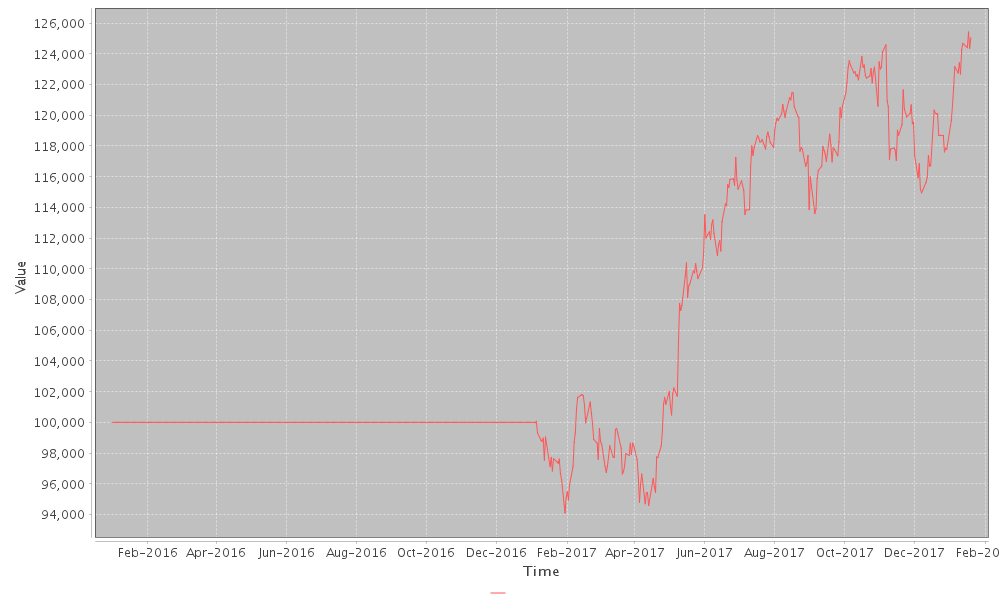

In [171]:
var chart = new TimeSeriesChart()
chart.add(account.getTotalValueHistory(),"")
Displayers.display(chart.displayChart())



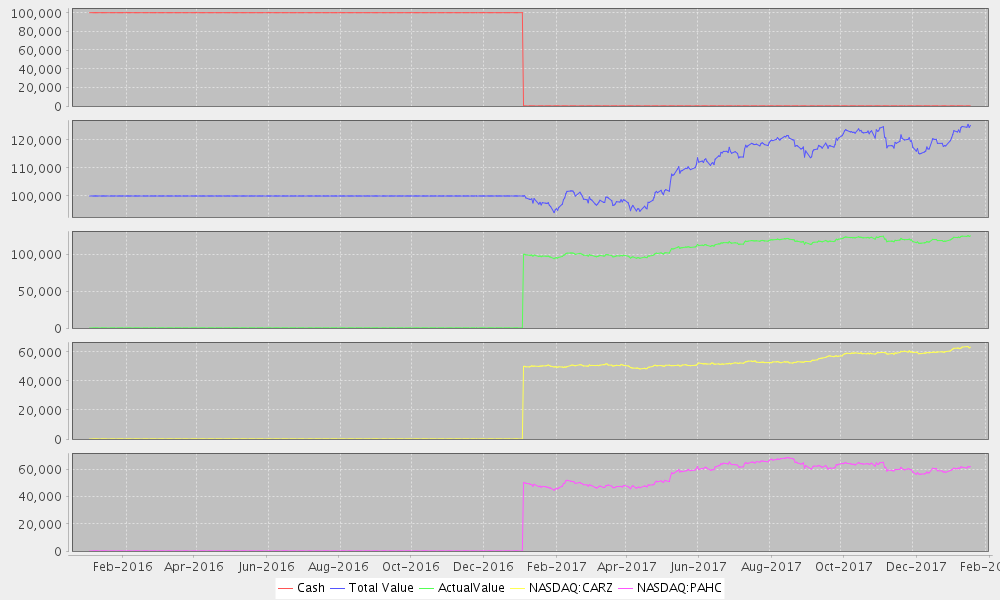

In [172]:
import scala.collection.JavaConversions._

var chart1 = new TimeSeriesChart()
chart1.add(account.getCashHistoryForAllDates(), "Cash");
chart1.add(account.getTotalValueHistory(), "Total Value");
chart1.add(account.getActualValueHistory(), "ActualValue");
for (id <- account.getStockIDs()) {
    var data = account.getActualValueHistory(id);
    chart1.add(data,id.toString())
}
//chart1.addLabels(account.getTransactions())
Displayers.display(chart1.displayCharts())

Though at first sight it seems to be promising, the result is in fact quite disapointing: We only get 2 stocks which are used for trading and they are just bought and never sold. So it is just by luck that we were successfull!

### Run the Selection  - 2nd Attempt ###


On our 2nd trial we want to use the followig additional criteria:
- no penny stocks: rate > 5.0
- activly traded: number of trades >= 4

Therefore we define the following predicates which drive our selection

In [173]:
import ch.pschatzmann.stocks.strategy.selection.SelectionState;
import java.util.function.Predicate;

class NumberOfTradesPredicate( numberOfTrades: Double) extends Predicate[SelectionState]  {
     override def test(state:SelectionState):scala.Boolean = {
        return state.result().getDouble(KPI.NumberOfTrades) > numberOfTrades;
    };
}

class PriceLimitPredicate(account:Account, date:Date, limit: Double) extends Predicate[SelectionState]  {
     override def test(state:SelectionState):scala.Boolean = {
        return account.getStockPrice(state.getStockID(), date)>limit;
    };
}

import ch.pschatzmann.stocks.strategy.selection.SelectionState
import java.util.function.Predicate
defined class NumberOfTradesPredicate
defined class PriceLimitPredicate


In [174]:

// setup of the model

var periods = Context.getDateRanges("2016-01-01","2017-01-01");
var account = new Account("Simulation", "USD", 100000.00, periods.get(0).getStart(), new PerTradeFees(100.00))
var file = new java.io.File("NASDAQ-2017-01-01A.json")
if (!file.exists()) {
    var universe = new MarketUniverse("NASDAQ")
    var strategies = TradingStrategyFactory.list()
    var predicate = new NumberOfTradesPredicate(4.0).and(new PriceLimitPredicate(account, periods.get(0).getStart(), 5.0));
    var strategySelector = new StrategySelector(account, strategies, periods.get(0), KPI.AbsoluteReturn, predicate)
    var stockSelector = new StockSelector(strategySelector, new Restartable("restart-v1A.ser",50))
    // calculate the result
    var result = stockSelector.getSelection(200, universe, new MarketArchiveHttpReader())
    // save the result to a file
    result.save(file)     
} 

// provide result even if we did not run the selection above
var resultA = new SelectionResult()
resultA.load(file)
var trader = new PaperTrader(account);
var allocationStrategy = new DistributedAllocationStrategy(trader);
var executor = new StrategyExecutor(trader, allocationStrategy);
executor.addStrategy(resultA.getStrategies(new MarketArchiveHttpReader()));
executor.run(periods.get(1));

account.getKPIValues()

[Absolute Return 0.0, Absolute Return Avarage per day NaN, Absolute Return StdDev NaN, Return % 0.0, Return % per year 0.0, Return % StdDev NaN, Sharp Ratio NaN, Max Draw Down % null, Max Draw Down Absolute null, Max Draw Down - Number of days null, Max Draw Down - High null, Max Draw Down - Low null, Max Draw Down - Period null, Number of Trades 0, Number of Buys 0, Number of Sells 0, Number of Cash Transfers 1, Number of Traded Stocks 0, Total Fees 0.0, Cash 100000.0, Total Value (at actual rates) including cash 100000.0, Total Value (at purchased rates) 100000.0, Realized Gains 0.0, Unrealized Gains 0.0]

### Selection with Sharpe Ratio ###

In the long run we might be better off by using the Sharpe Ratio instead of the Absolute Return as selection criterium. So here is our next try:


In [175]:
// setup of the model

var periods = Context.getDateRanges("2016-01-01","2017-01-01");
var account = new Account("Simulation", "USD", 100000.00, periods.get(0).getStart(), new PerTradeFees(100.00))
var file = new java.io.File("NASDAQ-2017-01-01S.json")
if (!file.exists()) {
    var universe = new MarketUniverse("NASDAQ")
    var strategies = TradingStrategyFactory.list()
    var strategySelector = new StrategySelector(account, strategies, periods.get(0), KPI.SharpeRatio)
    var stockSelector = new StockSelector(strategySelector, new Restartable("restart-v1S.ser",50))
    // calculate the result
    var result = stockSelector.getSelection(200, universe, new MarketArchiveHttpReader())
    // save the result to a file
    result.save(file) 
} 

// provide result even if we did not run the selection above
var resultS = new SelectionResult()
resultS.load(file)
var trader = new PaperTrader(account);
var allocationStrategy = new DistributedAllocationStrategy(trader);
var executor = new StrategyExecutor(trader, allocationStrategy);
executor.addStrategy(resultS.getStrategies(new MarketArchiveHttpReader()));
executor.run(periods.get(1));

account.getKPIValues()

[Absolute Return -95743.38202537596, Absolute Return Avarage per day -187.73212161838424, Absolute Return StdDev 5843.812344481103, Return % -95.74338202537596, Return % per year -47.21591442347308, Return % StdDev 0.07739180282189885, Sharp Ratio -0.6909314558908972, Max Draw Down % 98.06741328837373, Max Draw Down Absolute 211245.8531461507, Max Draw Down - Number of days 251, Max Draw Down - High 215408.8152860403, Max Draw Down - Low 4162.962139889598, Max Draw Down - Period 20170111-20180104, Number of Trades 1, Number of Buys 1, Number of Sells 0, Number of Cash Transfers 1, Number of Traded Stocks 1, Total Fees 100.0, Cash 0.482232928276062, Total Value (at actual rates) including cash 4256.617974624038, Total Value (at purchased rates) 99900.0, Realized Gains 0.0, Unrealized Gains -95643.38202537596]

## Electronic Monkey ##

We can compare the results above with an Monkey Picker which just pick 50 random stocks and strategies 

In [ ]:
var account = new Account("Simulation","USD", 1000000.00, periods.get(0).getStart(), new PerTradeFees(10.0));
var trader = new PaperTrader(account);
var allocationStrategy = new DistributedAllocationStrategy(trader);
var executor = new StrategyExecutor(trader, allocationStrategy);
var randomStrategies = TradingStrategyFactory.getRandomStrategies(new MarketUniverse("NASDAQ"),new MarketArchiveHttpReader(), 50)
executor.addStrategy(randomStrategies);
executor.run(periods.get(1));

println(account.getKPIValues())

## Optimization ##
We can also evaluate if parameter optimization makes a difference. We optimize the parameters based
on the closing rates of the year 2015. Then we select the stocks that perfomred best in 2016.
Finally we evaluate the performance for 2017 

In [ ]:
// setup of the model in background
var periods = Context.getDateRanges("2015-01-01","2016-01-01","2017-01-01","2018-01-01")
var account = new Account("Simulation", "USD", 100000.00, periods.get(0).getStart(), new PerTradeFees(100.00))
var file = new java.io.File("NASDAQ-2017-01-01-optimized.json")
if (!file.exists()) {
    // run selection
    var universe = new MarketUniverse("NASDAQ")
    var strategies = TradingStrategyFactory.list()
    var optimizer = new BinarySearchOptimizer(new SimulatedFitness(account), KPI.AbsoluteReturn)
    var strategySelector = new StrategySelectorOptimized(account, strategies, periods.get(0), periods.get(1), optimizer)
    var stockSelector = new StockSelector(strategySelector, new Restartable("restart-v2.ser",20))
    // calculate the result
    var resultOptimized = stockSelector.getSelection(200, universe, new MarketArchiveHttpReader())
    // save the result to a file
    resultOptimized.save(file)
}

// Run evaluation 
var resultOptimized = new SelectionResult()
resultOptimized.load(file)
var trader = new PaperTrader(account);
var allocationStrategy = new DistributedAllocationStrategy(trader);
var executor = new StrategyExecutor(trader, allocationStrategy);
executor.addStrategy(resultOptimized.getStrategies(new MarketArchiveHttpReader()));
executor.run(periods.get(2));

account.getKPIValues()

In [ ]:
Displayers.display(account.getTransactions());
